# Continue analyzing the Coronavirus dataset, which is available from Johns Hopkins, but also merge this database with another database. Look for other information elsewhere on the internet, which we trust, to draw more conclusions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [3]:
# check if contains China in Country/Region column
confirmed[confirmed['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,103248
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,13371
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,10483
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,3292,3292


In [4]:
# create a variable for China and include to the dataframe confirmed
china = confirmed[confirmed['Country/Region'] == 'China']
confirmed['is_China'] = confirmed['Country/Region'] == 'China'
confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,is_China
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,False


<Axes: xlabel='is_China'>

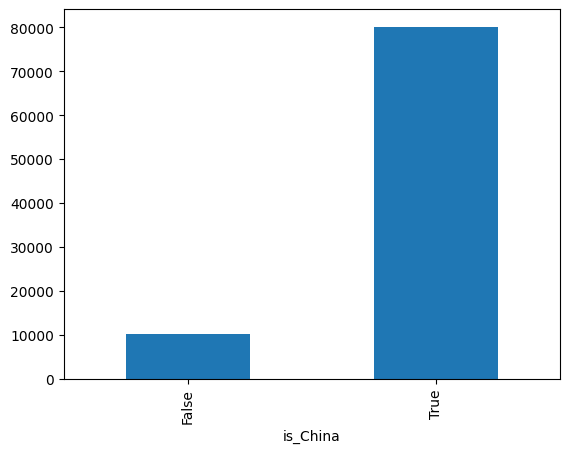

In [5]:
# plot the number of confirmed cases in China and the rest of the world
confirmed.groupby('is_China').sum(numeric_only=True)['3/2/20'].plot(kind='bar')

**On date 3/2/2020, China had 8x more cases than the rest of the world combined.**
**However, just looking at this plot seems very limited.**

In [6]:
# using numpy to create a new column with the label China or Others
confirmed['is_China_label'] = np.where(confirmed['is_China'], 'China', 'Others')

In [7]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,is_China,is_China_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209358,209362,209369,209390,209406,209436,209451,209451,False,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334408,334427,334427,334427,334427,334427,334443,334457,False,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271463,271469,271469,271477,271477,271490,271494,271496,False,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47890,47890,False,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105288,105288,False,Others


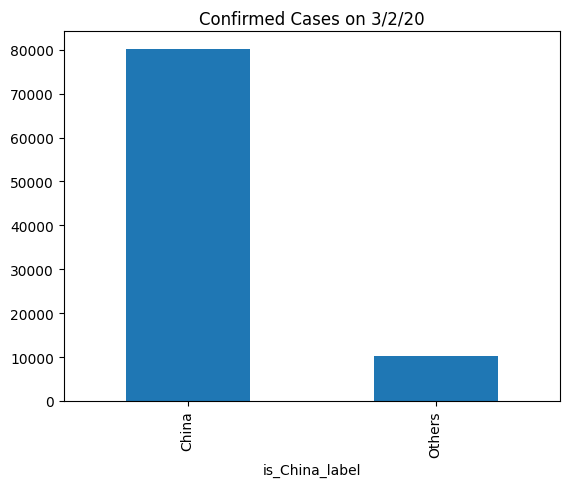

In [8]:
confirmed.groupby('is_China_label').sum(numeric_only=True)['3/2/20'].plot(kind='bar')
plt.title('Confirmed Cases on 3/2/20')
plt.show()

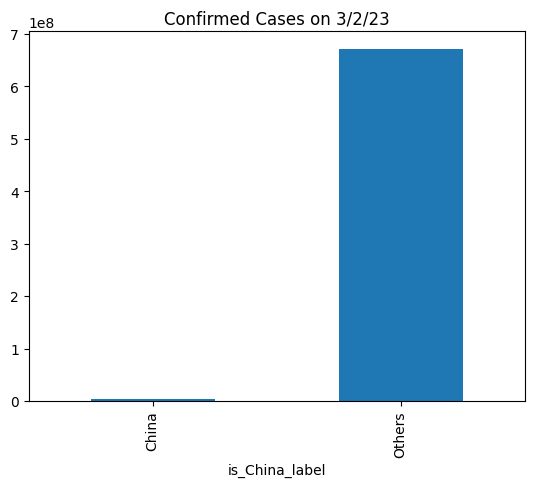

In [9]:
# checking the same date but year 2023
confirmed.groupby('is_China_label').sum(numeric_only=True)['3/2/23'].plot(kind='bar')
plt.title('Confirmed Cases on 3/2/23')
plt.show()

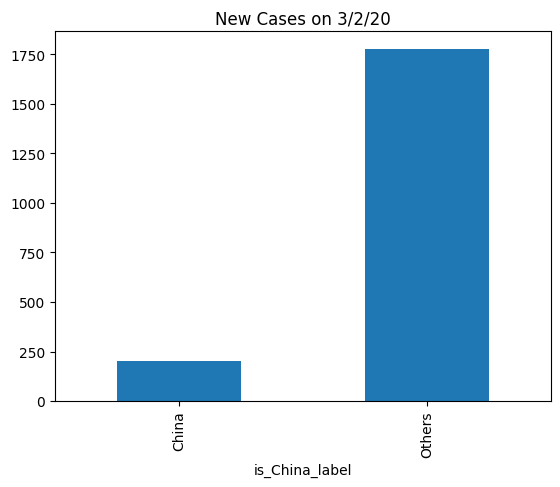

In [10]:
# checking new cases between 3/1/20 and 3/2/20
cases = confirmed.groupby('is_China_label').sum(numeric_only=True)
cases['new_cases'] = cases['3/2/20'] - cases['3/1/20']
cases['new_cases'].plot(kind='bar')
plt.title('New Cases on 3/2/20')
plt.show()

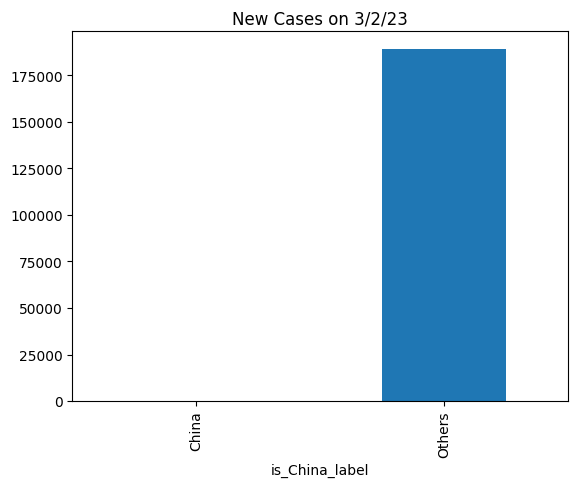

In [11]:
# checking new cases between 3/1/23 and 3/2/23
cases = confirmed.groupby('is_China_label').sum(numeric_only=True)
cases['new_cases'] = cases['3/2/23'] - cases['3/1/23']
cases['new_cases'].plot(kind='bar')
plt.title('New Cases on 3/2/23')
plt.show()


In [ ]:
c